In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Data: https://www.kaggle.com/datasets/arshid/iris-flower-dataset
iris = pd.read_csv("IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

y = iris.iloc[:,[4]]
print(y)

            species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


## Data Exploration

In [113]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [114]:
# we can see here the data is ordered by class/species
iris[0:10]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [115]:
# illustrating the boundaries, as the data is ordered
iris[49:61]

,sepal_length,sepal_width,petal_length,petal_width,species
49,5.0,3.3,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor


In [116]:
# illustrating the boundaries (again), as the data is ordered
iris[97:105]

,sepal_length,sepal_width,petal_length,petal_width,species
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


In [117]:
# distribution of species
iris_distribution = pd.crosstab(index=iris["species"], columns="count")      
iris_distribution

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


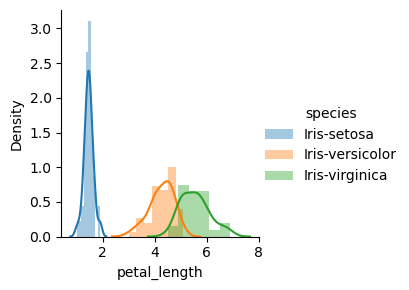

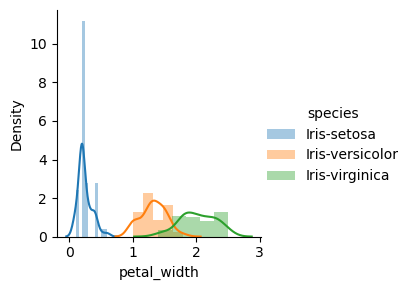

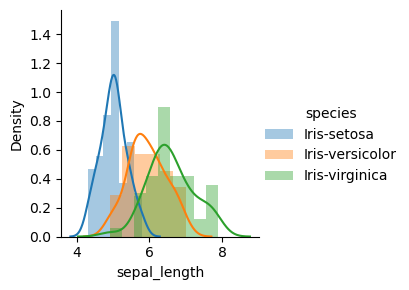

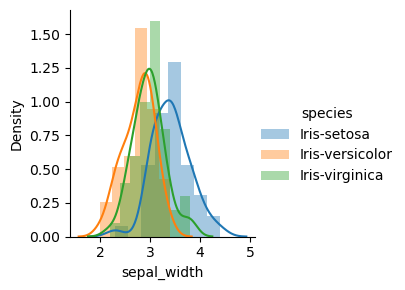

In [118]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"sepal_width").add_legend()
plt.show();

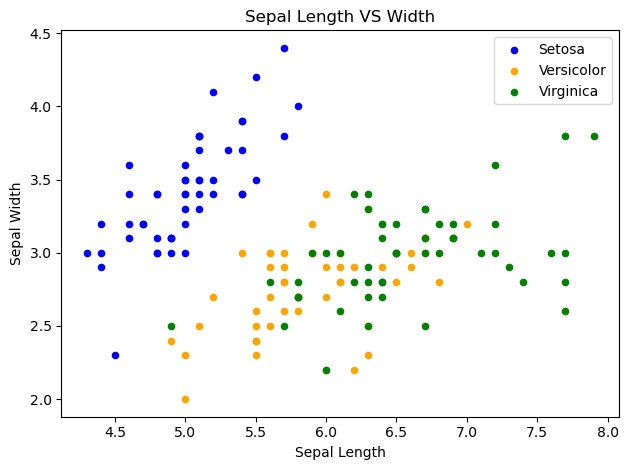

In [119]:
fig = iris[iris.species=='Iris-setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue', label='Setosa')
iris[iris.species=='Iris-versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange', label='Versicolor',ax=fig)
iris[iris.species=='Iris-virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
# fig.set_size_inches(10,6)
plt.show();

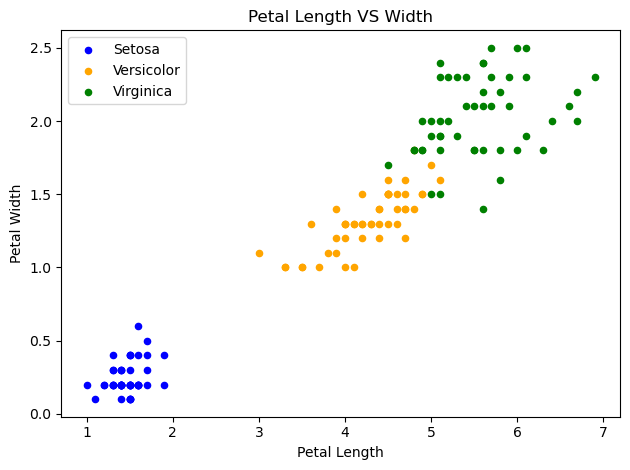

In [120]:
fig = iris[iris.species=='Iris-setosa'].plot(kind='scatter',x='petal_length',y='petal_width',color='blue', label='Setosa')
iris[iris.species=='Iris-versicolor'].plot(kind='scatter',x='petal_length',y='petal_width',color='orange', label='Versicolor',ax=fig)
iris[iris.species=='Iris-virginica'].plot(kind='scatter',x='petal_length',y='petal_width',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
plt.show();

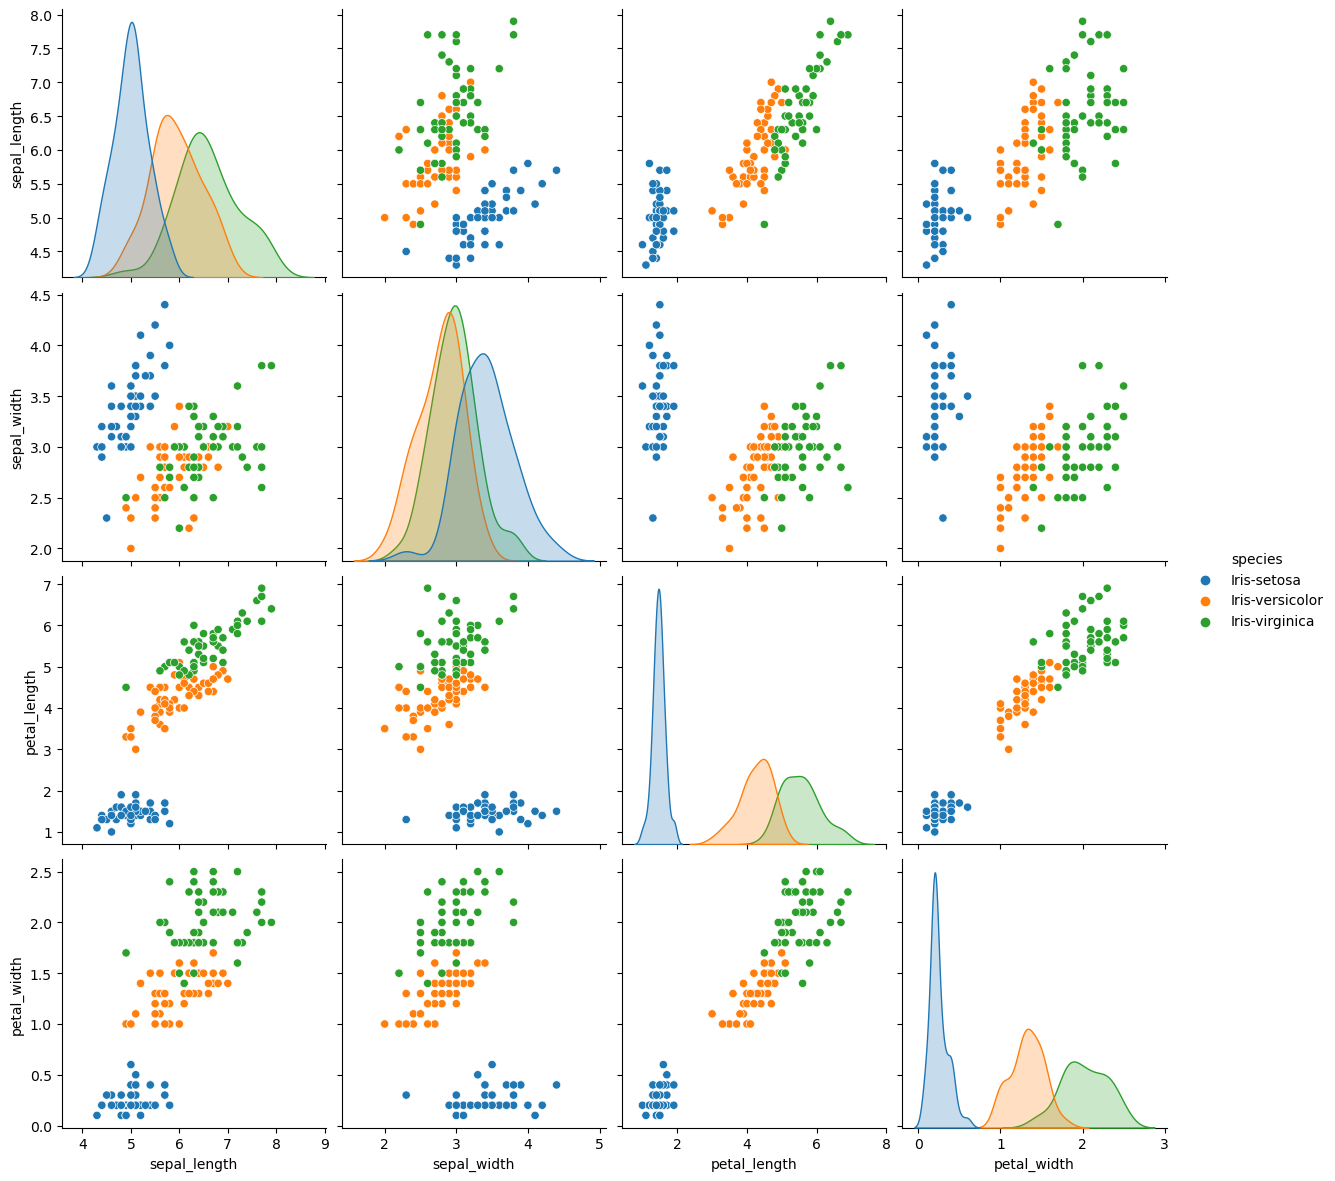

In [121]:
sns.pairplot(iris,hue="species",height=3);
plt.show();

In [122]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [123]:
# let's look at correlation between features
# to do this we need to convert the labels into ints (numeric values)
# for now we will do this on a duplicate dataset as to keep the labels 
# for K-means (to keep code readable)
data = iris
species_mapping = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
data['species'] = data['species'].map(species_mapping)
print(data['species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [124]:
iris_corr = data.corr()
iris_corr 

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


### K-Means Clustering

In [126]:
#Find the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []  # within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

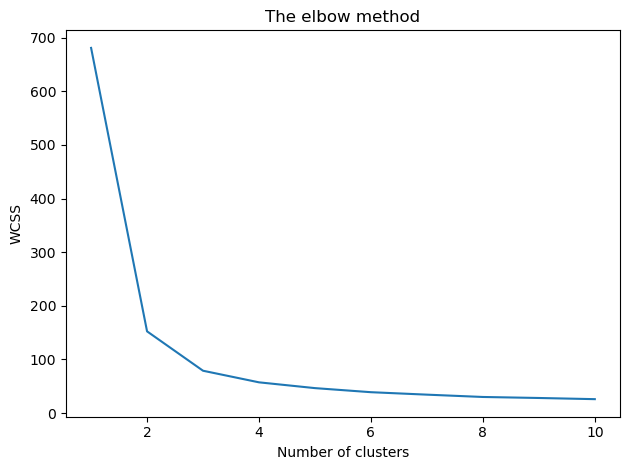

In [127]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

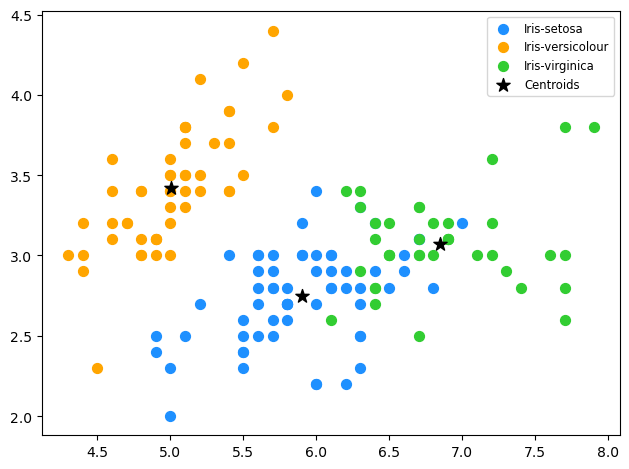

In [128]:
# using the 3 clusters we found (or knew instintively as there are 3 species)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'dodgerblue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'limegreen', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, 
            c = 'black', marker='*', label = 'Centroids')

plt.legend(loc="best", fontsize="small");

In [17]:
# with 3 clusters identified as optimal, now split, train and test a model
# grab new data to ensure it is clean
fresh_iris = pd.read_csv("IRIS.csv")

# encode the label
label_en = LabelEncoder()
fresh_iris['species']=label_en.fit_transform(fresh_iris['species'])
fresh_iris

# split into x (data) and y(target)
X=fresh_iris.drop(['species'],axis=1)
y=fresh_iris['species']

# split, train/fit & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
km = KMeans(n_clusters=3, random_state = 42)
km.fit(X_train)
km_lables = km.predict(X_test)

In [18]:
k_meansCM = confusion_matrix(y_test, km_lables)
k_meansCM

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  4, 12]], dtype=int64)

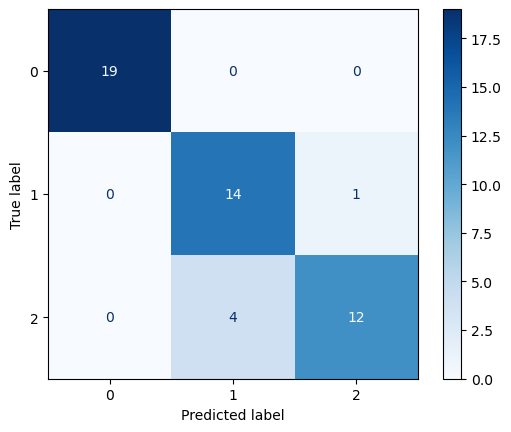

In [19]:
# plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
dispKM = ConfusionMatrixDisplay(
        confusion_matrix = k_meansCM,
        )
dispKM.plot(cmap=plt.cm.Blues)
plt.show()

In [20]:
print(classification_report(y_test, km_lables))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.78      0.93      0.85        15
           2       0.92      0.75      0.83        16

    accuracy                           0.90        50
   macro avg       0.90      0.89      0.89        50
weighted avg       0.91      0.90      0.90        50



#### Logistic Regression

In [203]:
# re-import to ensure clear data
iris = pd.read_csv("IRIS.csv")
print(iris)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [165]:
# encode the label
le = LabelEncoder()
irisEncoded = iris
irisEncoded['species']=le.fit_transform(iris['species'])
irisEncoded

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [166]:
# split into x (data) and y(target)
X=irisEncoded.drop(['species'],axis=1)
y=irisEncoded['species']

In [167]:
# scale data
sc = StandardScaler()
X = sc.fit_transform(X)

In [168]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

print(f'Total # of samples in whole dataset: {len(X)}')
print(f'Total # of samples in train dataset: {len(X_train)}')
print(f'Total # of samples in test dataset: {len(X_test)}')

Total # of samples in whole dataset: 150
Total # of samples in train dataset: 100
Total # of samples in test dataset: 50


In [169]:
# model training and testing

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.98

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [171]:
# confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred )
cm

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


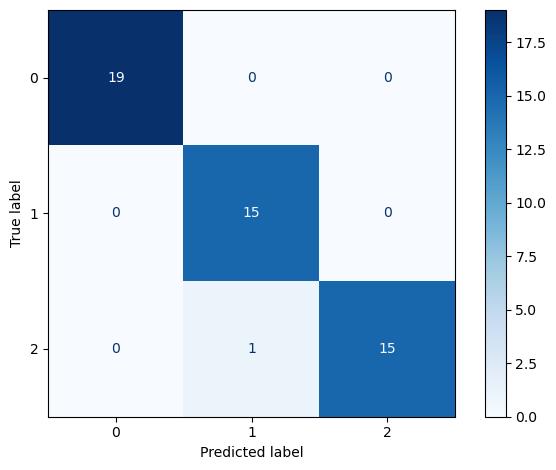

In [172]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        LogReg,
        X_test,
        y_test,
       cmap=plt.cm.Blues,
    )
print(disp.confusion_matrix)

In [225]:
import lime
from lime import lime_tabular

# note that as this is a multiclass problem I have set the top_labels param to ensure that the only the top class is explained

lime_explainer = lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names= iris.iloc[0:0],
#     class_names=iris.loc[:,'species'],
    mode='classification'
)

# lets pick a random observation/classification to explain
i = np.random.randint(0, X_test.shape[0])

lime_exp = lime_explainer.explain_instance(
    data_row = X_test[i],
    predict_fn=LogReg.predict_proba,
    top_labels=1
)

lime_exp.show_in_notebook(show_table=True)